# Assignment 3(due on 11/22)

## Student:郭悦怡（12332285），Gtihub：YueyiGuo
## 批改人：吴昊天

## 得分：48/60

# ⭐注意要提交的是.ipynb文件而不是.py文件

# 1. Niño 3.4 index

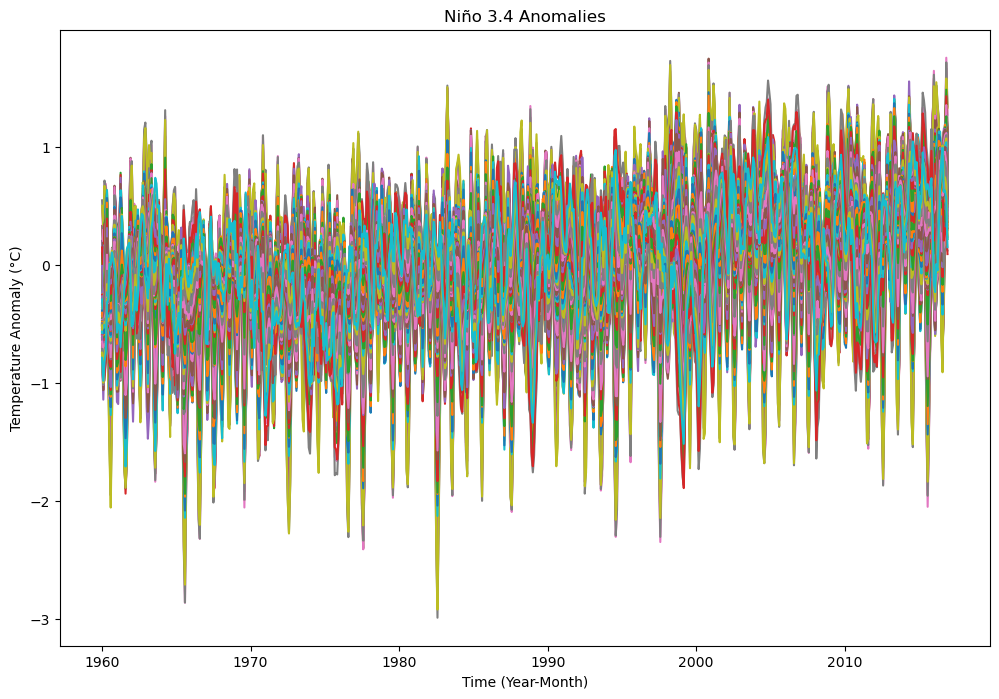

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 21 17:11:29 2023

@author: Administrator
"""

import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
from matplotlib import pyplot as plt

# # 1 Niño 3.4 index

# Load the dataset
ds = nc.Dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# Extract the SST variable
sst = ds.variables['sst'][:]

# Define the Niño 3.4 region (5N-5S, 170W-120W)
lat_mask = (ds.variables['lat'][:] >= -5) & (ds.variables['lat'][:] <= 5)
lon_mask = (ds.variables['lon'][:] >= 120) & (ds.variables['lon'][:] <= 170)

# Create a 2D mask for the Niño 3.4 region
mask = np.outer(lat_mask, lon_mask)

# Extract the data from the Niño 3.4 region
nino34_region = sst[:, mask]





# ## 1.1
# Compute the monthly climatology
climatology = np.mean(nino34_region, axis=0)

# Compute the anomalies
anomalies = nino34_region - climatology

# Convert the time variable to datetime format
import datetime
time = ds.variables['time'][:]
time_units = ds.variables['time'].units
time_calendar = ds.variables['time'].calendar
dates = nc.num2date(time, units=time_units, calendar=time_calendar)

# Convert dates to year-month format
dates = [datetime.datetime(date.year, date.month, 1) for date in dates]





# ## 1.2 

# Visualize the computed Niño 3.4
plt.figure(figsize=(12, 8))
plt.plot(dates, anomalies)
plt.title('Niño 3.4 Anomalies')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()



Text(0.5, 0, 'year')

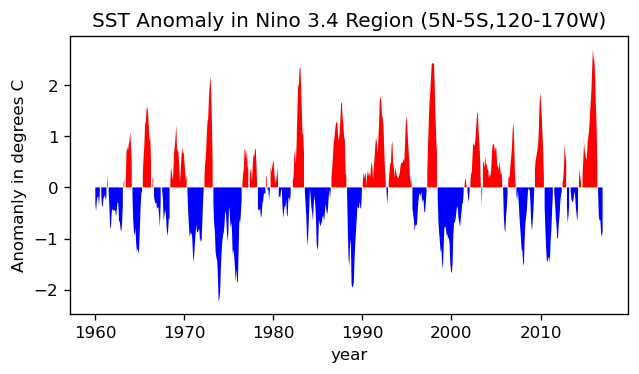

In [3]:
# TA提供的参考代码
# 1.1
ds= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
Sac= ds.sst.sel(lon=slice(190, 240), lat=slice(-5, 5)).groupby('time.month')
Nino = Sac - Sac.mean(dim='time')
NinoMean = Nino.mean(dim=['lat', 'lon'])

# 1.2
plt.figure(figsize=(6,3), dpi=120)
plt.fill_between(NinoMean.time,NinoMean.data,where=(NinoMean>0),facecolor = 'red')
plt.fill_between(NinoMean.time,NinoMean.data,where=(NinoMean<0),facecolor = 'blue')
plt.title("SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)")
plt.ylabel("Anomanly in degrees C")
plt.xlabel("year")

### 1.1 需要从海温时间序列中减去气候学得到异常。
### 1.2 没有按要求绘制相似的图像。
### TA提供了参考代码
### 得分：16/20

### =============================

# 2. Earth’s energy budget

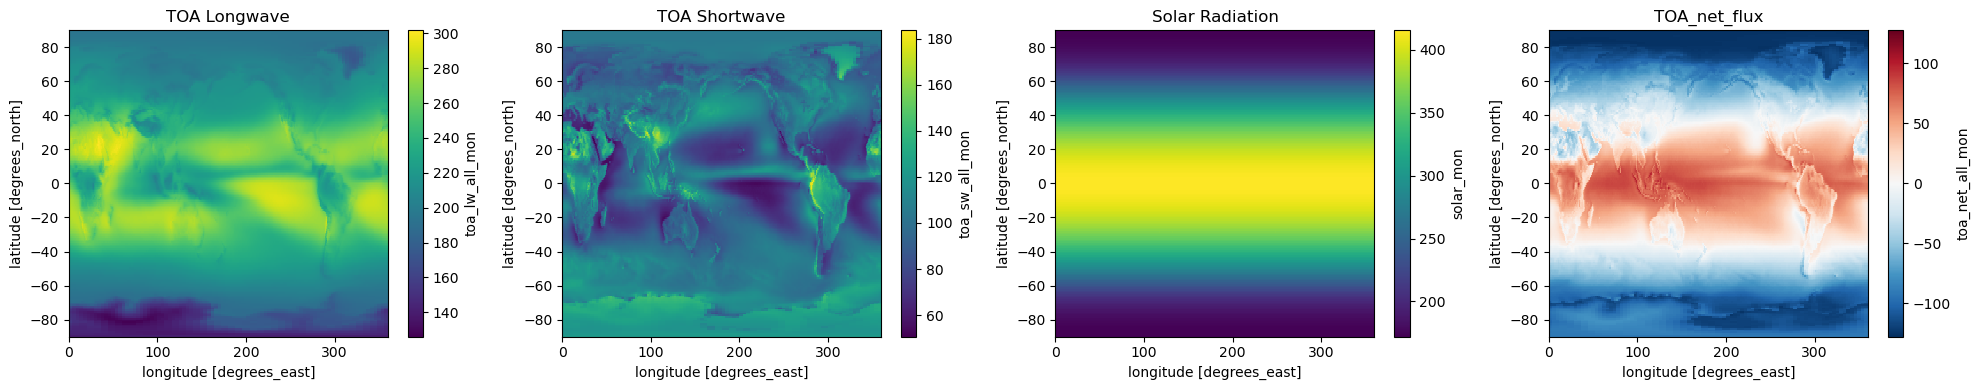

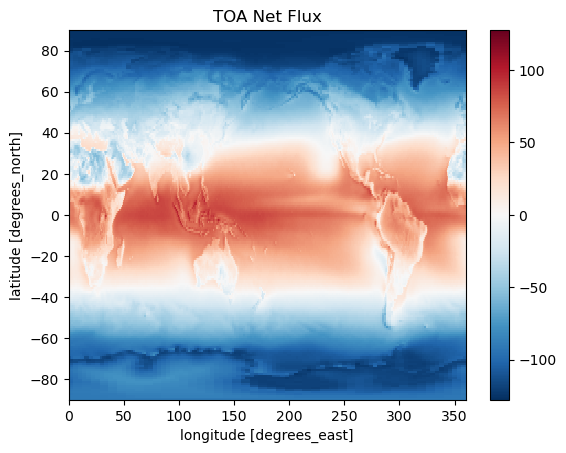

Global mean TOA longwave radiation: 224.7551727294922
Global mean TOA shortwave radiation: 102.30432891845703
Global mean solar radiation: 298.3305358886719
outgoing_lw: 99.13904887794754
outgoing_lw: 240.26801592931807
incoming_solar: 340.2851878183128


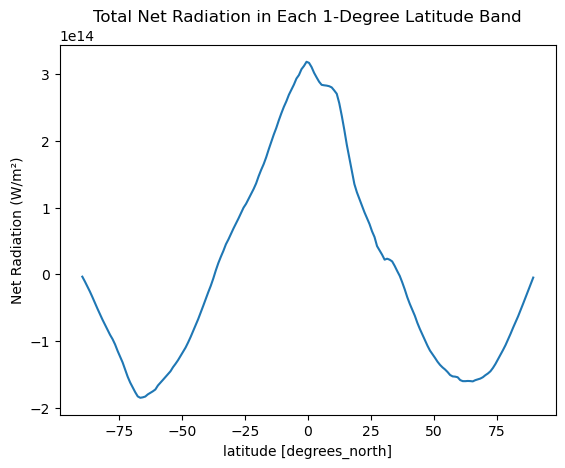

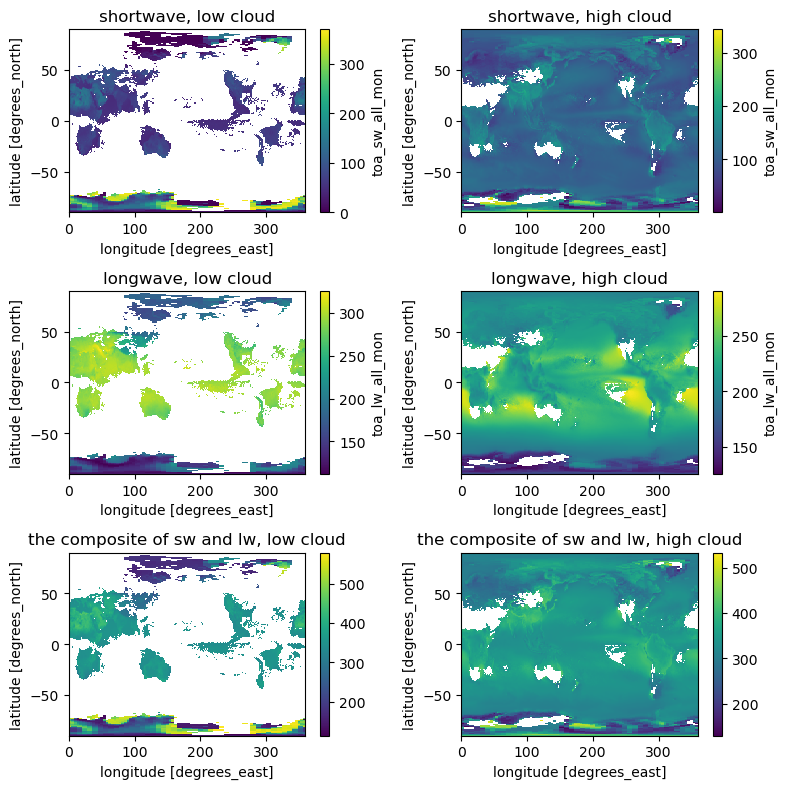

Global mean values of shortwave radiation in low cloud and high cloud regions: 218.92471313476562
Global mean values of longwave radiation in low cloud and high cloud regions: 430.665283203125
Global mean values of shortwave and longwave radiation in low cloud region: 321.8834533691406
Global mean values of shortwave and longwave radiation in high cloud region: 330.11669921875
sw_low_gm: 19.6518862515028
lw_low_gm: 70.50560433619916
sw_high_gm: 104.54761502011318
lw_high_gm: 208.5353114726085


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 21 17:13:10 2023

@author: Administrator
"""

# # 2 Earth’s energy budget

# load the dataset
TOA = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
TOA.data_vars
#TOA['cldarea_total_daynight_mon']



# ## 2.1 
# Make a plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions

# Compute the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions
toa_lw_all_mon = TOA['toa_lw_all_mon'].mean(dim='time')
toa_sw_all_mon = TOA['toa_sw_all_mon'].mean(dim='time')
solar_mon = TOA['solar_mon'].mean(dim='time')
toa_net_all_mon = TOA['toa_net_all_mon'].mean(dim='time')

# Make a plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions
fig, axes = plt.subplots(ncols=4, figsize=(20, 4))
toa_lw_all_mon.plot(ax=axes[0])
axes[0].set_title('TOA Longwave')
toa_sw_all_mon.plot(ax=axes[1])
axes[1].set_title('TOA Shortwave')
solar_mon.plot(ax=axes[2])
axes[2].set_title('Solar Radiation')
toa_net_all_mon.plot(ax=axes[3])
axes[3].set_title('TOA_net_flux')
plt.tight_layout()
plt.show()

# Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

net_flux = toa_lw_all_mon + toa_sw_all_mon + solar_mon
net_flux = solar_mon - toa_lw_all_mon - toa_sw_all_mon      #TA
net_flux.plot()
plt.title('TOA Net Flux')
plt.show()

# the sum of TOA longwave, shortwave, and solar radiation for all-sky conditions is not equivalent to the TOA net flux.





# ## 2.2
# Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

# Calculate the global mean values
glb_mean_toa_lw_all_mon = toa_lw_all_mon.mean(dim=['lat', 'lon']).values
glb_mean_toa_sw_all_mon = toa_sw_all_mon.mean(dim=['lat', 'lon']).values
glb_mean_solar_mon = solar_mon.mean(dim=['lat', 'lon']).values

print(f'Global mean TOA longwave radiation: {glb_mean_toa_lw_all_mon}')
print(f'Global mean TOA shortwave radiation: {glb_mean_toa_sw_all_mon}')
print(f'Global mean solar radiation: {glb_mean_solar_mon}')

# As the cartoon showes, incoming solar radiation(340.4) = total reflected solar radiation(99.9) + total outgoing infrared radiation(239.9) + net absorbed(0.6)
# 
# My calculation outputs are as given above, Global mean TOA longwave radiation(224.7551727294922) ≈ 239.9，Global mean TOA shortwave radiation(102.30432891845703) ≈ 99.9, and Global mean solar radiation(298.3305358886719) ≈ 340.4
# 
# Therefore, the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

# 2.2 TA add
# TA提供的we参考代码

import math

sw=TOA.toa_sw_all_mon.mean(dim='time')
lw=TOA.toa_lw_all_mon.mean(dim='time')
solar=TOA.solar_mon.mean(dim='time')
net=TOA.toa_net_all_mon.mean(dim='time')
total=solar-sw-lw

R=6371 
delta=2*(math.pi)*R*(np.cos(TOA['lat']*(math.pi)/180))/360
area=delta*2*(math.pi)*R/360
Total_surface_area=area.sum()*360
Total_surface_area

sw_cal=sw*area*1e6
outgoing_sw=sw_cal.sum()/Total_surface_area/1e6
print('outgoing_lw:',outgoing_sw.values)

lw_cal=lw*area*1e6
outgoing_lw=lw_cal.sum()/Total_surface_area/1e6
print("outgoing_lw:",outgoing_lw.values)

solar_cal=solar*area*1e6
incoming_solar=solar_cal.sum()/Total_surface_area/1e6
print("incoming_solar:",incoming_solar.values)



# ## 2.3
# Calculate and plot the total amount of net radiation in each 1-degree latitude band.

total_net_radiation = net_flux.sum(dim='lon') * area * 1e6
total_net_radiation.plot()
plt.ylabel('Net Radiation (W/m²)')
plt.title('Total Net Radiation in Each 1-Degree Latitude Band')
plt.show()





# ## 2.4
# Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. 

# define low cloud area as ≤25% and high cloud area as ≥75%
low_cloud_area = TOA['cldarea_total_daynight_mon'] <= 25
high_cloud_area = TOA['cldarea_total_daynight_mon'] >= 75

# time-mean for low and high cloud area regions
low_cloud_sw = TOA['toa_sw_all_mon'].where(low_cloud_area).mean(dim='time')
high_cloud_sw = TOA['toa_sw_all_mon'].where(high_cloud_area).mean(dim='time')
low_cloud_lw = TOA['toa_lw_all_mon'].where(low_cloud_area).mean(dim='time')
high_cloud_lw = TOA['toa_lw_all_mon'].where(high_cloud_area).mean(dim='time')

lowcld_sl = low_cloud_sw + low_cloud_lw
highcld_sl = high_cloud_sw + high_cloud_lw

# plot low and high cloud composites outgoing shortwave and longwave radiation
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
low_cloud_sw.plot(ax=axs[0, 0])
axs[0,0].set_title('shortwave, low cloud')
high_cloud_sw.plot(ax=axs[0, 1])
axs[0,1].set_title('shortwave, high cloud')
low_cloud_lw.plot(ax=axs[1, 0])
axs[1,0].set_title('longwave, low cloud')
high_cloud_lw.plot(ax=axs[1, 1])
axs[1,1].set_title('longwave, high cloud')
lowcld_sl.plot(ax=axs[2,0])
axs[2,0].set_title('the composite of sw and lw, low cloud')
highcld_sl.plot(ax=axs[2,1])
axs[2,1].set_title('the composite of sw and lw, high cloud')
plt.tight_layout()
plt.show()





# ## 2.5
# Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions.

glb_mean_sw_lowhigh = (low_cloud_sw + high_cloud_sw).mean()
glb_mean_lw_lowhigh = (low_cloud_lw + high_cloud_lw).mean()
glb_mean_low_cld = lowcld_sl.mean()     # 全球low cloud region的平均太阳辐射（短波+长波）
glb_mean_high_cld = highcld_sl.mean()   # 全球high cloud region的平均太阳辐射（短波+长波）
print(f'Global mean values of shortwave radiation in low cloud and high cloud regions: {glb_mean_sw_lowhigh.values}')
print(f'Global mean values of longwave radiation in low cloud and high cloud regions: {glb_mean_lw_lowhigh.values}')
print(f'Global mean values of shortwave and longwave radiation in low cloud region: {glb_mean_low_cld.values}')
print(f'Global mean values of shortwave and longwave radiation in high cloud region: {glb_mean_high_cld.values}')

# TA 提供的代码
sw_low=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim=['time'])
sw_high=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim=['time'])
lw_low=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim=['time'])
lw_high=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim=['time'])

sw_low_=sw_low*area*1e6
sw_low_gm=sw_low_.sum()/Total_surface_area/1e6
print('sw_low_gm:',sw_low_gm.values)

lw_low_=lw_low*area*1e6
lw_low_gm=lw_low_.sum()/Total_surface_area/1e6
print('lw_low_gm:',lw_low_gm.values)

sw_high_=sw_high*area*1e6
sw_high_gm=sw_high_.sum()/Total_surface_area/1e6
print('sw_high_gm:',sw_high_gm.values)

lw_high_=lw_high*area*1e6
lw_high_gm=lw_high_.sum()/Total_surface_area/1e6
print('lw_high_gm:',lw_high_gm.values)

# As the cartoon showes, total reflected solar radiation is 99.9 W/m^2, total outgoing infrared radiation is 239.9 W/m^2. Compared with the calculation results given above, global mean shortwave radiation is 218.92 W/m^2 for low cloud and high cloud areas, global mean longwave radiation is 430.67 W/m^2 for low cloud and high cloud areas.and Global mean values of shortwave and longwave radiation in low cloud area is 321.88 W/m^2,  global mean values of shortwave and longwave radiation in high cloud area is  330.12 W/m^2.
# 
# Therefore, clouds can scatter and absorb shortwave radiation from the sun and block longwave radiation emitted from the surface. And I found that high cloud areas scatter and absorb more solar radiation than low cloud areas. In addition, clouds emit longwave thermal radiation to the surface and into space, which plays a key role in the earth's energy budget.


### 2.1 部分绘制图像正确，the TOA net flux 计算错误，公式应为“net_flux = solar_mon - toa_lw_all_mon - toa_sw_all_mon”，没有验证辐射平衡。助教修改了代码。
### 2.2 计算有误，计算均值时要考虑格网面积大小，因为不同纬度的格网并不是等面积的，需要进行面积加权。助教提供了参考代码。
### 2.3 上一题计算错误导致，图像绘制有误。
### 2.4 图像绘制正确。
### 2.5 计算结果错误,需要考虑面积加权。进行了分析。助教提供了参考代码。
### 得分：22/30

### =============================

# 3. Explore a netCDF dataset

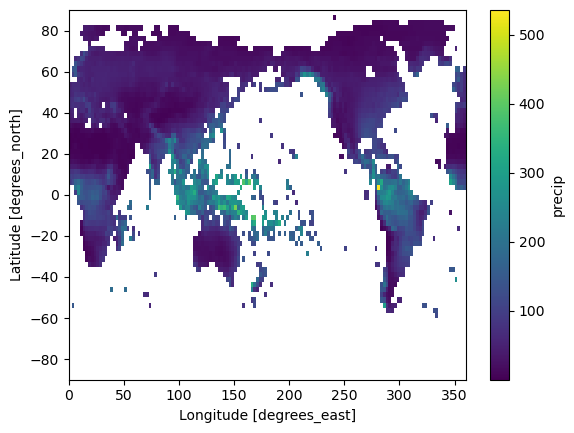

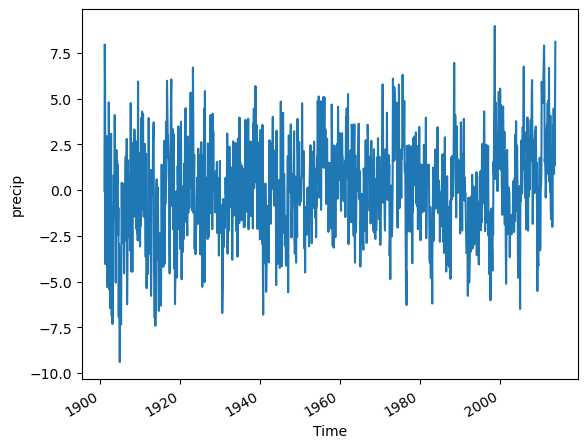

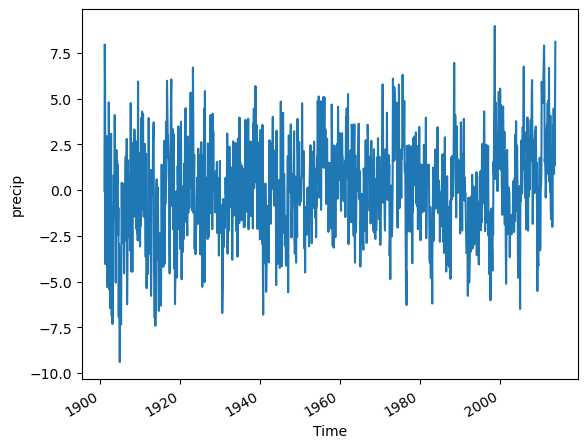

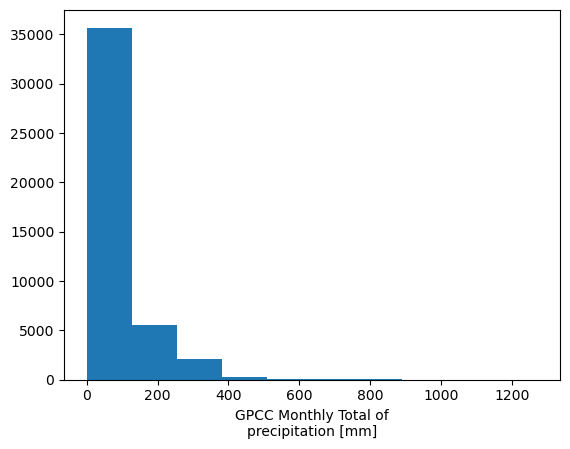

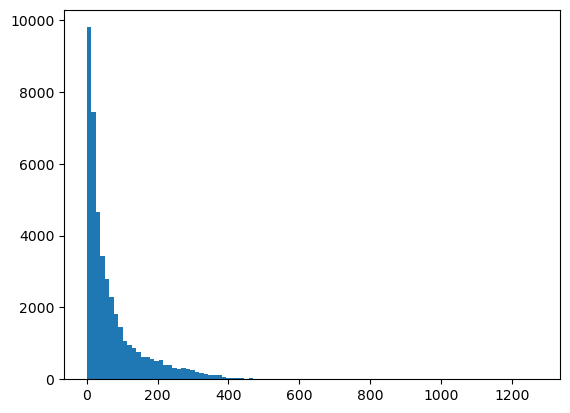

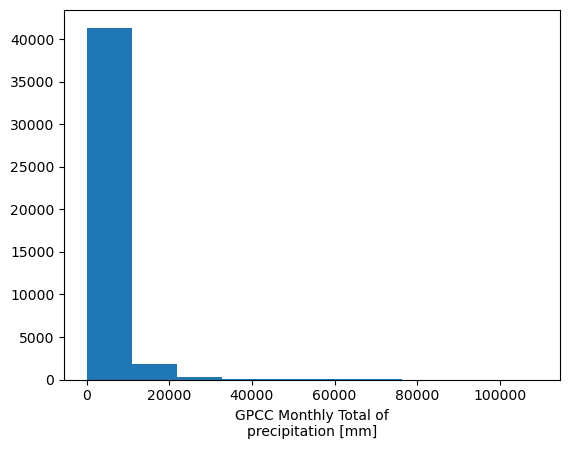

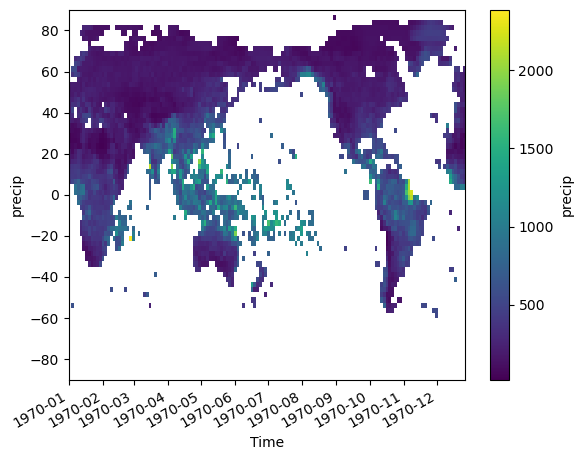

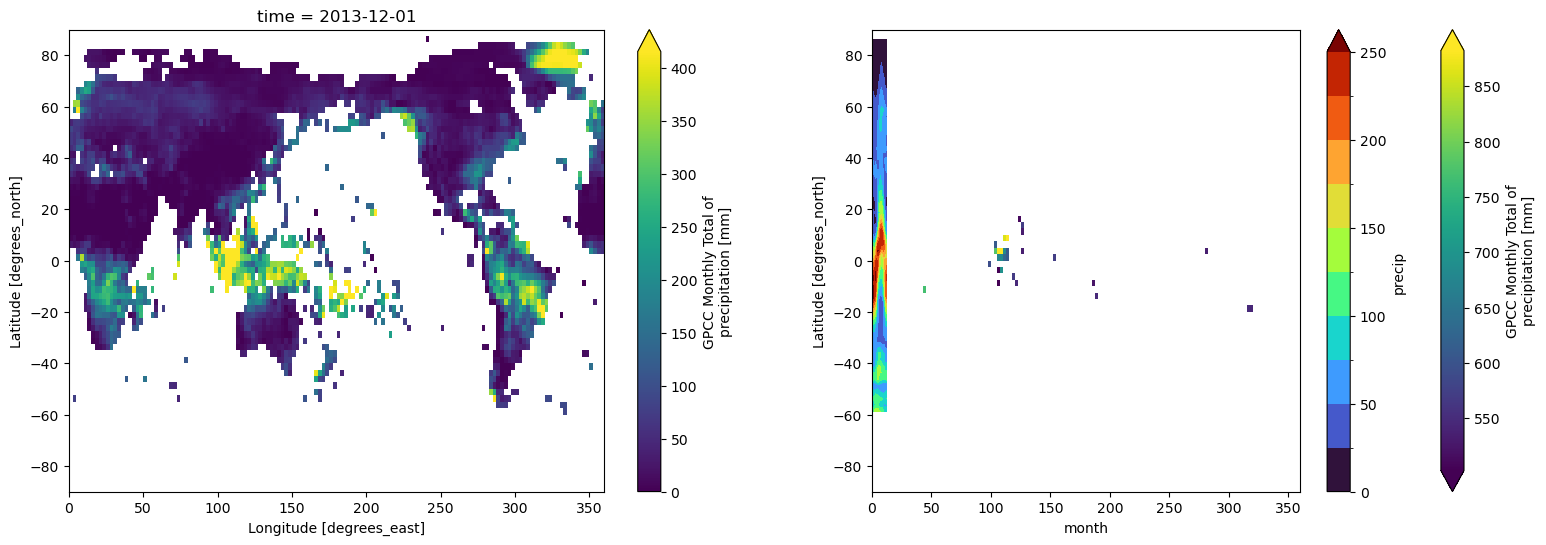

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 21 17:17:32 2023

@author: Administrator
"""

# # 3 Explore a netCDF dataset


# Load the dataset
pp=xr.open_dataset("precip.mon.total.2.5x2.5.v7.nc",engine="netcdf4")
plt.figure(1)
pp['precip'].mean(dim='time').plot()


# I use the monthly precipitation dataset from NOAA Physical Sciences Laboratory GPCC(Global Precipitation Climatology Centre) from 1891-present,the dataset is calculated from global station data.
# https://psl.noaa.gov/data/gridded/data.gpcc.html#detail





# ## 3.1
# Plot a time series of 'precip' with monthly seasonal cycle removed


# Group data by month
mon_pp = pp.precip.groupby('time.month')
mon_pp.mean(dim='time')

# Apply mean to grouped data, and then compute the anomaly
precip_anom = mon_pp - mon_pp.mean(dim='time')
precip_anom

# Plot global mean anomalies
plt.figure(2)
precip_anom.mean(dim=['lat','lon']).plot()


# Group data by month
mon_pp = pp.precip.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly
pp_anom = mon_pp - mon_pp.mean()
pp_anom

# Plot global mean anomalies
plt.figure(3)
pp_anom.mean(dim=['lat','lon']).plot()






# ## 3.2 
# Make 5 plots using the dataset

# ### Plot 1:
# Various statistical graphs of the precipitation data

# Mean of precipitation
plt.figure(4)
mon_pp.mean(dim='time').plot()
plt.show()

# Histogram of precipitation
plt.figure(5)
plt.hist(mon_pp.mean(dim='time').values.flatten(), bins=100)
plt.show()

# Variance of the variable over time
plt.figure(6)
mon_pp.var('time').plot()
plt.show()



# ### Plot 2:
# Calculate the monthly max global precipitation in time series

pp.precip.max(dim=['time']).plot()



# ### Plot 3:
# Calculate the monthly max global precipitation in location

pp.precip.max(dim=['lat','lon']).plot()



# ### Plot 4 :
# The precipitation(pp) of last year(2013) and select the area of pp>500

# The last year pp
pp_new = pp.precip.isel(time=-1)
pp_new

# the last year pp where pp is higher than 500
masked_pp_new = pp_new.where(pp_new > 500.0)
masked_pp_new

# Plot 2 panels
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
pp_new.plot(ax=axes[0], robust=True)
masked_pp_new.plot(ax=axes[1], robust=True)

# Note: the last year of the dataset is 2013.



# ### Plot 5: 
# Calculate and plot zonal mean climatology

precip_clim = pp.precip.groupby('time.month').mean()
precip_clim.mean(dim='lon').transpose().plot.contourf(levels=12, robust=True, cmap='turbo')



### 3.1 滑动平均能够在一定程度上去除季节性信号，满足题目要求。
### 3.2 满足题目要求。
### 得分：10/10

### =============================